라이브러리 버전을 확인

In [15]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


데이터 불러오기 + Resize 하기

In [16]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


가위, 바위, 보 이미지를 불러와서 28x28 사이즈로 변경

In [17]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [18]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [19]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


ataset 불러들이기

In [20]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


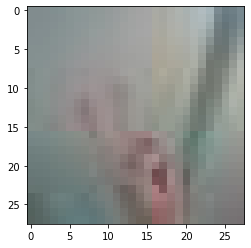

In [21]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [22]:
print(y_train[1])

0


또 다른 이미지를 출력해보기

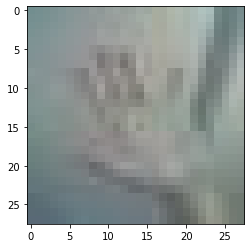

201 번째 이미지의 숫자는 바로  2 입니다.


In [24]:
# index에 0에서 300 사이 숫자를 지정해 보세요.
index=200   
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

라벨:  1


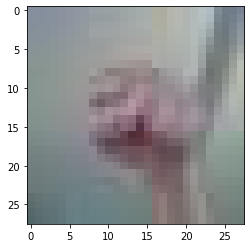

In [37]:
import matplotlib.pyplot as plt
plt.imshow(x_train[119])
print('라벨: ', y_train[119])

In [38]:
# 순서대로 학습 데이터, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train_norm, y_train, test_size=0.25, shuffle=False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 28, 28, 3)
(75, 28, 28, 3)
(225,)
(75,)


라벨:  0


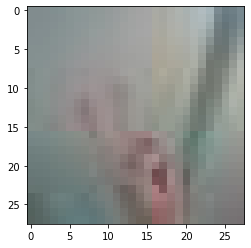

In [43]:
plt.imshow(X_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기

Sequential Model을 사용

In [44]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [66]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                204864    
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                204864    
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

딥러닝 네트워크 학습시키기

In [69]:
n_channel_1=32
n_channel_2=128
n_dense=512
n_epochs = 15
n_class_num = 3

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_class_num, activation='softmax'))

model.summary()
model.compile(optimizer='adam',             
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1638912   
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [70]:
model.fit(X_train, y_train, epochs=n_epochs)

print(X_train.shape)
print(y_train.shape)

Epoch 1/15
8/8 [==============================] - 0s 4ms/step - loss: 1.0531 - accuracy: 0.4533
Epoch 2/15
8/8 [==============================] - 0s 3ms/step - loss: 1.0125 - accuracy: 0.4444
Epoch 3/15
8/8 [==============================] - 0s 3ms/step - loss: 0.9840 - accuracy: 0.4489
Epoch 4/15
8/8 [==============================] - 0s 3ms/step - loss: 0.9861 - accuracy: 0.4444
Epoch 5/15
8/8 [==============================] - 0s 3ms/step - loss: 0.9760 - accuracy: 0.4178
Epoch 6/15
8/8 [==============================] - 0s 3ms/step - loss: 0.9716 - accuracy: 0.5111
Epoch 7/15
8/8 [==============================] - 0s 3ms/step - loss: 0.9623 - accuracy: 0.4444
Epoch 8/15
8/8 [==============================] - 0s 3ms/step - loss: 0.9698 - accuracy: 0.3867
Epoch 9/15
8/8 [==============================] - 0s 3ms/step - loss: 0.9526 - accuracy: 0.5067
Epoch 10/15
8/8 [==============================] - 0s 3ms/step - loss: 0.9797 - accuracy: 0.4800
Epoch 11/15
8/8 [======================

Load testset, Preprocessing

In [71]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
Before Reshape - x_test_norm shape: (327, 28, 28, 3)
After Reshape - x_train_reshaped shape: (900, 28, 28, 1)
After Reshape - x_test_reshaped shape: (981, 28, 28, 1)


In [72]:
model.evaluate(x_test_norm, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 1.0063 - accuracy: 1.0000


[1.006296157836914, 1.0]

얼마나 잘 만들었는지 확인하기

test 데이터 가져오기

In [87]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

11/11 - 0s - loss: 1.0063 - accuracy: 1.0000
test_loss: 1.006296157836914 
test_accuracy: 1.0


In [88]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.36557046 0.3452451  0.28918448]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


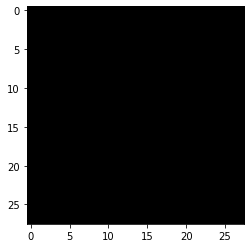

In [89]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

In [91]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.36557046 0.3452451  0.28918448]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


In [93]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

11/11 - 0s - loss: 1.0063 - accuracy: 1.0000
test_loss: 1.006296157836914
test_accuracy: 1.0


In [94]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
import os	
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissors_paper/test/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissors_paper/test/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissors_paper/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

test_image_path = os.getenv("HOME") + "/aiffel/rock_scissors_paper/test"
(x_test, y_test)=load_data(test_image_path, number_of_data=327)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화, Training set 과 같은 처리

0  images to be resized.
0  images resized.
가위 이미지 resize 완료!
0  images to be resized.
0  images resized.
바위 이미지 resize 완료!
0  images to be resized.
0  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 0 입니다.


데이터를 다시 확인하고 오니 잘 저장이 되어있는데 0이라고 뜨기에 다시 코드를 바꾸어 작성해보았다.

In [97]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [98]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [99]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [104]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/aiffel/rock_scissor_paper/test/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/aiffel/rock_scissor_paper/test/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/aiffel/rock_scissor_paper/test/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


파일이 test 데이터에 잘 저장되어있는데도 불구하고 왜 이렇게 결과가 나오는지 해결하지 못한 채로 제출한다. 테스트 폴더에 가위바위보 이미지가 각각 100장씩, 총 300장 저장되어있는데 가져오려고만 하면 꼭 0장이 나와버린다. 정확도는 1.0이라고 나오는데 데이터 오류 때문에 1.0이라 나오는 것으로 생각된다. 이 부분에 대해 조금 더 자세히 알아봐야겠다.